In [1]:
%pip install matplotlib
%pip install scikit-learn
%pip install seaborn

You should consider upgrading via the '/home/gkaretka/.pyenv/versions/3.9.13/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/home/gkaretka/.pyenv/versions/3.9.13/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/home/gkaretka/.pyenv/versions/3.9.13/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

2023-03-09 09:40:05.702858: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-09 09:40:06.030715: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-09 09:40:06.030743: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-09 09:40:07.141552: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [3]:
# load dataset but select only 3s
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X_3, test_X_3 = (train_X[train_y == 3], test_X[test_y == 3])

# 6131 images, 28x28 = 784px
img_x_size = train_X_3.shape[1]
img_y_size = train_X_3.shape[2]
train_X_3.shape

(6131, 28, 28)

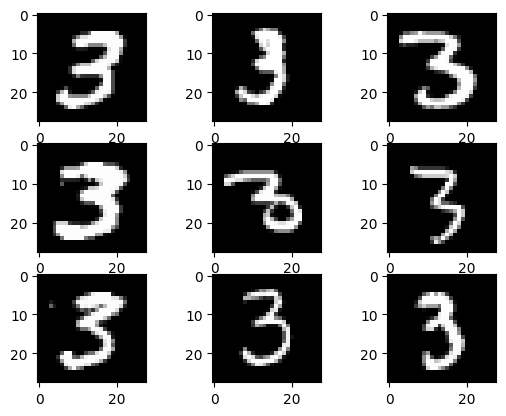

In [4]:
fig, axs = plt.subplots(nrows=3, ncols=3)
for i in range(3):
  for j in range(3):
    axs[i][j].imshow(train_X_3[i*3+j], cmap=plt.get_cmap('gray'))
plt.show()

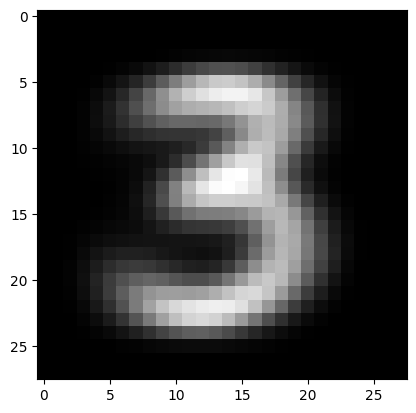

In [5]:
# get average three representation
avg_3_img = np.average(train_X_3, axis=0)
ax = plt.subplot()
ax.imshow(avg_3_img, cmap=plt.get_cmap('gray'))

<Axes: >

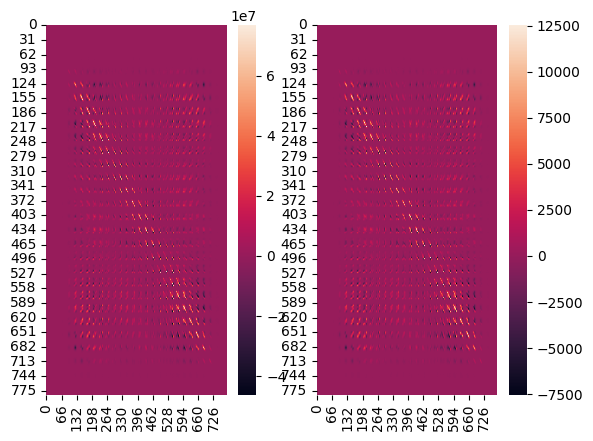

In [68]:
import seaborn as sns
from sklearn.decomposition import PCA

data = (train_X_3 - avg_3_img).reshape(train_X_3.shape[0], img_x_size*img_y_size)
cov = data.T @ data

# validation with PCA
pca = PCA(n_components=784).fit(data)
pca_cov = pca.get_covariance()

# it's just scaled by a scalar
fig, axs = plt.subplots(nrows=1, ncols=2)
sns.heatmap(cov, ax=axs[0])
sns.heatmap(pca_cov, ax=axs[1])

In [69]:
np.sum(cov - pca_cov)

349842542514.80426

In [70]:
var_per=0.98

eigvals, eigvects = np.linalg.eigh(cov)
evecs = eigvects.T[::-1]

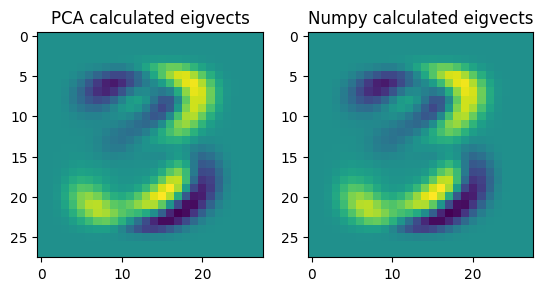

In [74]:
fig, axs = plt.subplots(nrows=1, ncols=2)

axs[0].imshow(pca.components_[0].reshape(28,28))
axs[0].set_title('PCA calculated eigvects')

axs[1].imshow(evecs[0].reshape(28,28,))
axs[1].set_title('Numpy calculated eigvects')
plt.show()

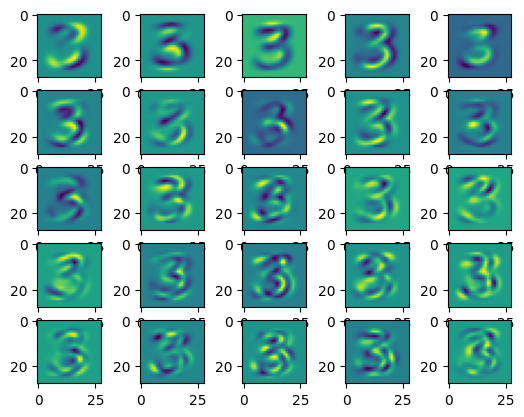

In [77]:
num_of_vectors_to_use = 25
num_of_vects_cols = 5
num_of_vects_row = 5

fig, axs = plt.subplots(nrows=num_of_vects_row, ncols=num_of_vects_cols)
for i in range(num_of_vects_row):
    for j in range(num_of_vects_cols):
        axs[i][j].imshow(evecs[i*num_of_vects_cols+j].reshape(img_x_size, img_y_size))

plt.show()

array([[   0.        +0.00000000e+00j,    0.        +0.00000000e+00j,
           0.        +0.00000000e+00j,    0.        +0.00000000e+00j,
           0.        +0.00000000e+00j,    0.        +0.00000000e+00j,
           0.        +0.00000000e+00j,    0.        +0.00000000e+00j,
           0.        +0.00000000e+00j,   57.        +0.00000000e+00j,
         197.        +0.00000000e+00j,  254.        +0.00000000e+00j,
         254.        +0.00000000e+00j,  222.        +0.00000000e+00j,
         180.        +0.00000000e+00j,  241.        +0.00000000e+00j,
         254.        +0.00000000e+00j,  254.        +0.00000000e+00j,
         253.        +0.00000000e+00j,  213.        +0.00000000e+00j,
          11.        +0.00000000e+00j,    0.        +0.00000000e+00j,
           0.        +0.00000000e+00j,    0.        +0.00000000e+00j,
           0.        +0.00000000e+00j,    0.        +0.00000000e+00j,
           0.        +0.00000000e+00j,    0.        +0.00000000e+00j,
           0.       

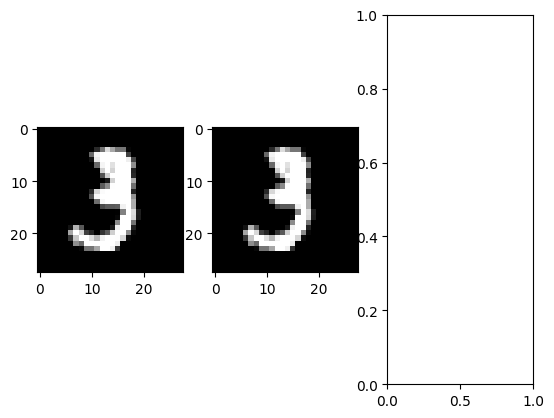

In [48]:
fig, axs = plt.subplots(nrows=1, ncols=3)
orig_img = train_X_3[1]

ctx3_minus_mean = orig_img # - avg_3_img
axs[0].imshow(orig_img, cmap=plt.get_cmap('gray'))
axs[1].imshow(ctx3_minus_mean, cmap=plt.get_cmap('gray'))

# reshape input image to 1x784
reshaped_ctx3_minux_mean = ctx3_minus_mean.reshape(1, img_x_size*img_y_size)

# 1x784 @ 784xn -> 1xn (n values characterizing original image)
ctx3_vectored = reshaped_ctx3_minux_mean @ sEigvects.T
# restoration 1xn @ nx784 -> 1x784
# uncompressed = ctx3_vectored @ sEigvects
# reshp_to = np.sqrt(uncompressed.shape[1]).astype(int)
# restored_img = uncompressed.reshape(reshp_to, reshp_to) + avg_3_img

# axs[2].imshow(restored_img.astype(float), cmap=plt.get_cmap('gray'))
# plt.show()